# Assignment_9_Association_Rule

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [36]:
!pip install mlxtend

In [37]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [38]:
df = pd.read_csv("D:\\Data Science\\Assignments\\book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [40]:
df.shape

(2000, 11)

In [41]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [43]:
print(df["ChildBks"].unique())
print(df["YouthBks"].unique())
print(df["CookBks"].unique())
print(df["DoItYBks"].unique())
print(df["RefBks"].unique())
print(df["ArtBks"].unique())
print(df["GeogBks"].unique())
print(df["ItalCook"].unique())
print(df["ItalAtlas"].unique())
print(df["ItalArt"].unique())
print(df["Florence"].unique())

[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]


In [44]:
print(df["ChildBks"].value_counts())
print(df["YouthBks"].value_counts())
print(df["CookBks"].value_counts())
print(df["DoItYBks"].value_counts())
print(df["RefBks"].value_counts())
print(df["ArtBks"].value_counts())
print(df["GeogBks"].value_counts())
print(df["ItalCook"].value_counts())
print(df["ItalAtlas"].value_counts())
print(df["ItalArt"].value_counts())
print(df["Florence"].value_counts())

0    1154
1     846
Name: ChildBks, dtype: int64
0    1505
1     495
Name: YouthBks, dtype: int64
0    1138
1     862
Name: CookBks, dtype: int64
0    1436
1     564
Name: DoItYBks, dtype: int64
0    1571
1     429
Name: RefBks, dtype: int64
0    1518
1     482
Name: ArtBks, dtype: int64
0    1448
1     552
Name: GeogBks, dtype: int64
0    1773
1     227
Name: ItalCook, dtype: int64
0    1926
1      74
Name: ItalAtlas, dtype: int64
0    1903
1      97
Name: ItalArt, dtype: int64
0    1783
1     217
Name: Florence, dtype: int64


In [45]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [46]:
df.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


In [47]:
df[df.duplicated()].head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(df)
plt.show()

# Apriori Algorithm

In [49]:
frequent_itemsets = apriori(df, min_support = 0.1, use_colnames= True)
frequent_itemsets

C:\Users\ADMIN\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [50]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [51]:
rules.sort_values('lift', ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
21,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
20,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


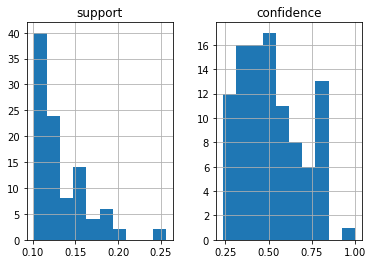

In [52]:
rules[['support', 'confidence']].hist()
plt.show()

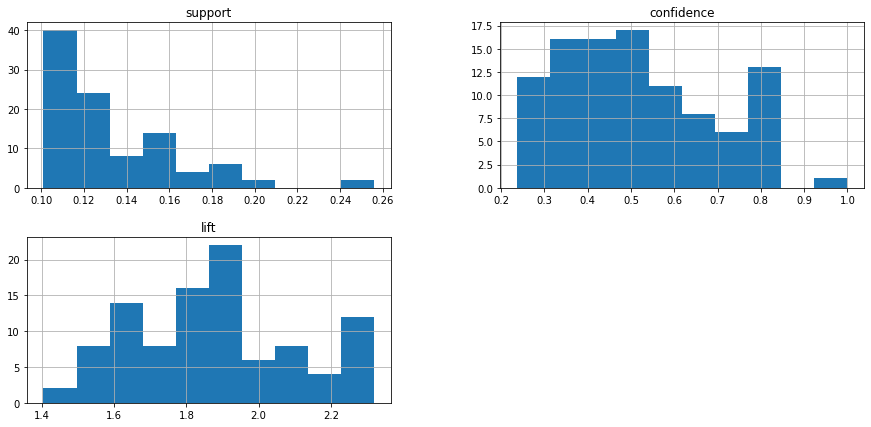

In [53]:
rules[['support', 'confidence', 'lift']].hist(figsize = (15,7))
plt.show()

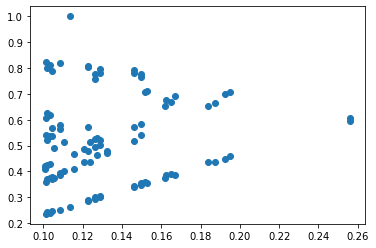

In [54]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


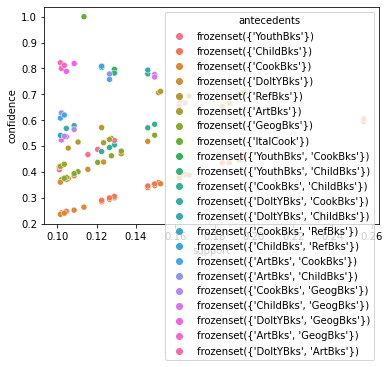

In [55]:
sns.scatterplot('support', 'confidence', data = rules, hue = 'antecedents')
plt.show()

In [56]:
!pip install nsepython

In [57]:
from nsepython import *
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [58]:
oi_data, ltp, crontime = oi_chain_builder("RELIANCE", "latest", "full")
print(oi_data)
print(ltp)
print(crontime)

C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

   CALLS_Chart CALLS_OI CALLS_Chng in OI CALLS_Volume CALLS_IV CALLS_LTP  \
0          0.0      0.0              0.0          0.0      0.0       0.0   
1          0.0      2.0              0.0          0.0      0.0       0.0   
2          0.0      0.0              0.0          0.0      0.0       0.0   
3          0.0      0.0              0.0          0.0      0.0       0.0   
4          0.0     12.0              0.0          6.0      0.0     378.0   
..         ...      ...              ...          ...      ...       ...   
61         0.0      0.0              0.0          0.0      0.0       0.0   
62         0.0      1.0              0.0          1.0    46.04       0.9   
63         0.0      1.0              0.0          1.0    45.92      0.75   
64         0.0    168.0             -2.0         26.0    49.28       1.1   
65         0.0     54.0              1.0          9.0     50.7      1.25   

   CALLS_Net Chng CALLS_Bid Qty CALLS_Bid Price CALLS_Ask Price  ...  \
0             0

C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

In [59]:
rule_1 = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.5)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [60]:
rule_1.sort_values('lift', ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
21,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
20,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


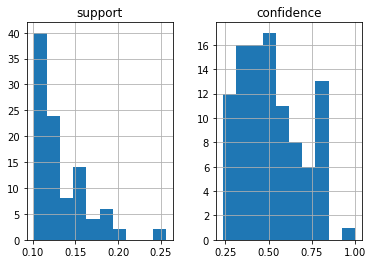

In [61]:
rule_1[['support', 'confidence']].hist()
plt.show()

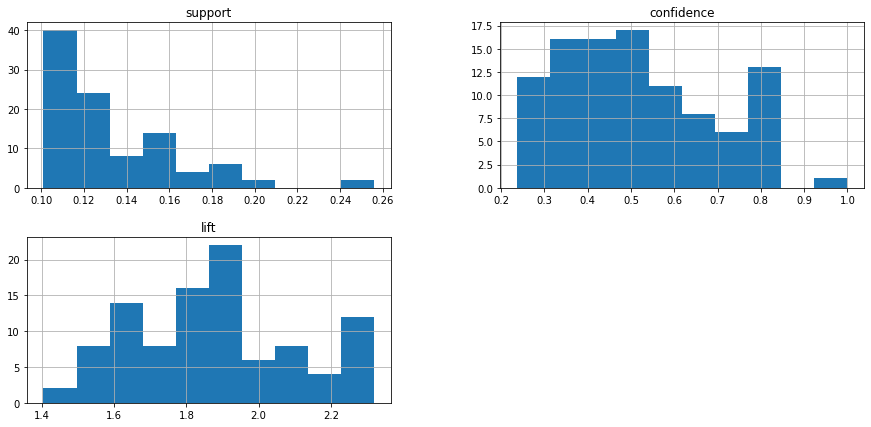

In [62]:
rule_1[['support', 'confidence', 'lift']].hist(figsize=(15,7))
plt.show()

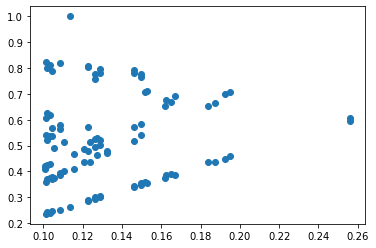

In [63]:
plt.scatter(rule_1['support'], rule_1['confidence'])
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


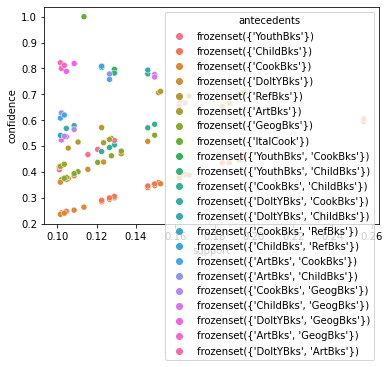

In [64]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data= rule_1, hue='antecedents')
plt.show()

In [73]:
rule_2 = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.01)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [74]:
rule_2.sort_values('lift', ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
21,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
20,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


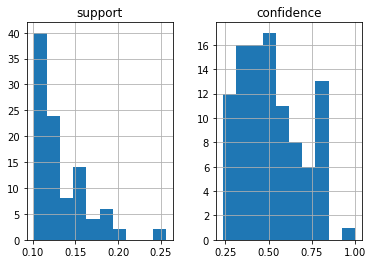

In [75]:
rule_2[['support', 'confidence']].hist()
plt.show()

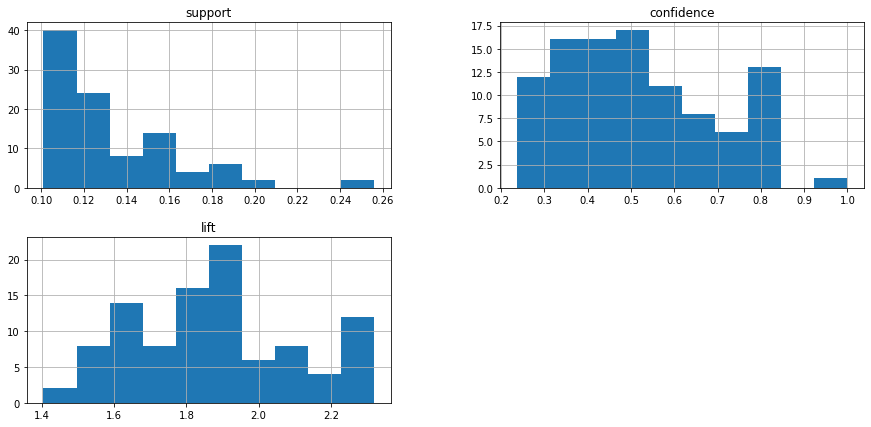

In [84]:
rule_2[['support', 'confidence', 'lift']].hist(figsize=(15,7))
plt.show()

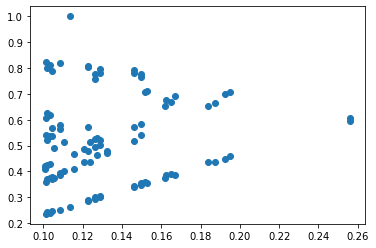

In [77]:
plt.scatter(rule_2['support'], rule_2['confidence'])
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


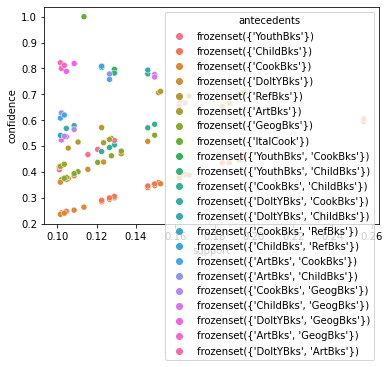

In [79]:
sns.scatterplot('support', 'confidence', data= rule_2, hue = 'antecedents')
plt.show()

In [80]:
!pip install nsepython

In [81]:
from nsepython import *   
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [82]:
oi_data, ltp, crontime = oi_chain_builder("RELIANCE","latest","full")
print(oi_data)
print(ltp)
print(crontime)

C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

   CALLS_Chart CALLS_OI CALLS_Chng in OI CALLS_Volume CALLS_IV CALLS_LTP  \
0          0.0      0.0              0.0          0.0      0.0       0.0   
1          0.0      2.0              0.0          0.0      0.0       0.0   
2          0.0      0.0              0.0          0.0      0.0       0.0   
3          0.0      0.0              0.0          0.0      0.0       0.0   
4          0.0     12.0              0.0          6.0      0.0     378.0   
..         ...      ...              ...          ...      ...       ...   
61         0.0      0.0              0.0          0.0      0.0       0.0   
62         0.0      1.0              0.0          1.0     46.0       0.9   
63         0.0      1.0              0.0          1.0    45.88      0.75   
64         0.0    167.0             -3.0         27.0    48.96       1.1   
65         0.0     54.0              1.0         11.0    49.26       1.0   

   CALLS_Net Chng CALLS_Bid Qty CALLS_Bid Price CALLS_Ask Price  ...  \
0             0